In [2]:
!pip install tensorflow tensorflow gpu matplotlib tensorflow datasets ipywidgets

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [4]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
gpus

[]

In [6]:
!pip install matplotlib

In [7]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [8]:
ds=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.TCHZO9_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.TCHZO9_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [13]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [14]:
import numpy as np


In [15]:
dataiterator=ds.as_numpy_iterator()

In [16]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

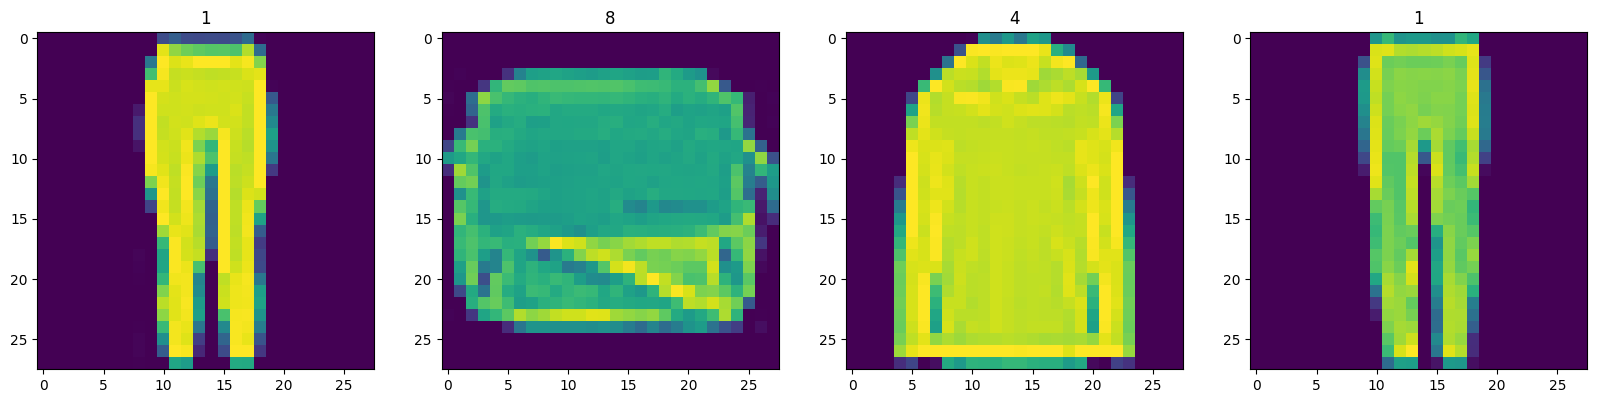

In [17]:
#Setup the subplot formatting
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
#Loop four times and get images
for idx in range(4):
    sample=dataiterator.next()
    #Plot image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    #Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [18]:
ax

array([<Axes: title={'center': '1'}>, <Axes: title={'center': '8'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>],
      dtype=object)

In [19]:
ax[0]

<Axes: title={'center': '1'}>

In [20]:
def scale_images(data):
  image=data['image']
  return image/255

In [21]:
ds=tfds.load('fashion_mnist',split='train')
ds=ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [22]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [23]:
#Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
#Bring in the layers
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [24]:
def build_generator():
  model=Sequential()
  #Takes in random values and rshapes it to 7*7*128
  model.add(Dense(7*7*128,input_dim=(128)))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  #Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=5,padding='same'))
  model.add(LeakyReLU(0.2))
  #Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=5,padding='same'))
  model.add(LeakyReLU(0.2))
  #Convultional block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))
  #Convolutional block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))
  #Conv layer to get to one channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [25]:
test_model=build_generator()

In [26]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [27]:
generator=build_generator()

In [28]:
img=generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 351ms/step


In [29]:
img

array([[[[0.5125213 ],
         [0.5150114 ],
         [0.5160329 ],
         ...,
         [0.5022184 ],
         [0.5013781 ],
         [0.50036985]],

        [[0.5114504 ],
         [0.51295704],
         [0.5064181 ],
         ...,
         [0.49357527],
         [0.49400246],
         [0.49627563]],

        [[0.50404596],
         [0.50901026],
         [0.5026024 ],
         ...,
         [0.4880376 ],
         [0.4951283 ],
         [0.49948123]],

        ...,

        [[0.49636275],
         [0.4985037 ],
         [0.5051753 ],
         ...,
         [0.49709734],
         [0.49798077],
         [0.5006089 ]],

        [[0.49978358],
         [0.50484204],
         [0.506572  ],
         ...,
         [0.4990556 ],
         [0.49857602],
         [0.5004242 ]],

        [[0.49717614],
         [0.49802813],
         [0.49746007],
         ...,
         [0.4983741 ],
         [0.4976324 ],
         [0.49887407]]],


       [[[0.5043697 ],
         [0.48845893],
         [0.49

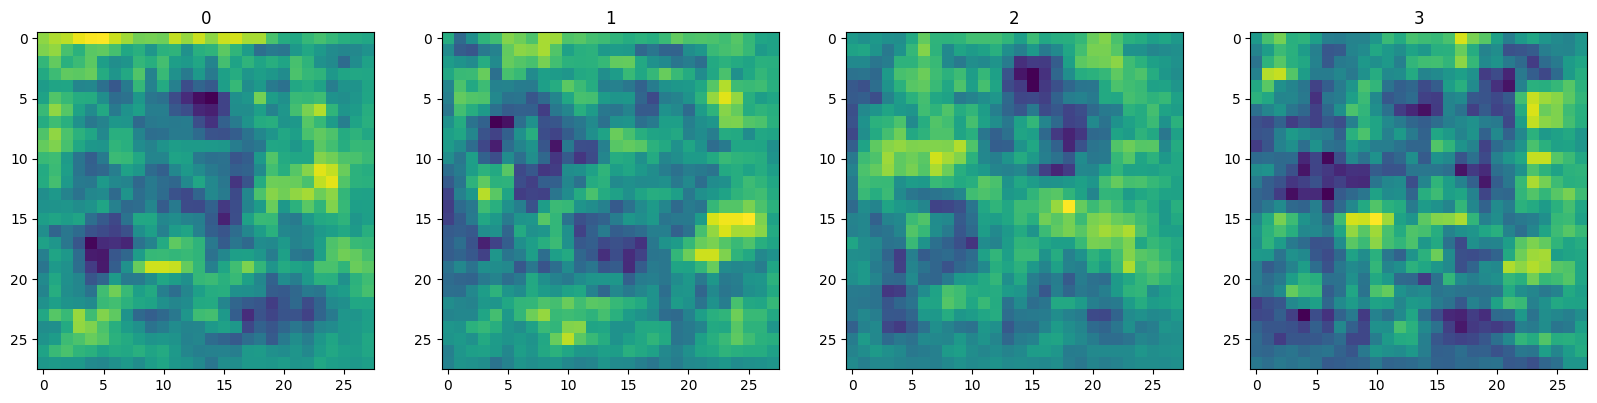

In [30]:
#Setup the subplot formatting
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
#Loop four times and get images
for idx,img in enumerate(img):
    #Plot image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    #Appending the image label as the plot title
    ax[idx].title.set_text(idx)

In [31]:
img.shape

(28, 28, 1)

In [32]:
def build_discriminator():
  model=Sequential()
  #first Conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Secind Conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Third Conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
   #Fourth Conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #Faltten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [33]:
discriminator=build_discriminator()

In [34]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [35]:
img.shape

(28, 28, 1)

In [36]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 145ms/step


array([[0.49973887]], dtype=float32)

In [37]:
discriminator.predict(img)

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/leaky_re_lu_10/LeakyRelu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-37-61a05ec220e5>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/activation/leaky_relu.py", line 72, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5378, in relu

convolution input must be 4-dimensional: [28,28,1]
	 [[{{node sequential_2/leaky_re_lu_10/LeakyRelu}}]] [Op:__inference_predict_function_141121]

In [38]:
#Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
#Binary cross entropy is going to be loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [39]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_Loss=BinaryCrossentropy()

In [40]:
#Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [44]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    #pass through args and kwargs to base
    super().__init__(*args,**kwargs)
    #Create attributes for gen and disc
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    #Compile with base class
    super().compile(*args,**kwargs)
    #Create attributes for losses and optimizers
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss
  def train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)
    #Train the discriminator
    with tf.GradientTape() as d_tape:
    #Pass the real and fake images to the discriminator model
     yhat_real=self.discriminator(real_images,training=True)
     yhat_fake=self.discriminator(fake_images,training=True)
     yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
    #Create labels for real and fake images
     y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
    #Add some noise to outputs
     noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))
     noise_fake=0.15*tf.random.uniform(tf.shape(yhat_fake))
     y_realfake+=tf.concat([noise_real,noise_fake],axis=0)
    #Calculate loss
     total_d_loss=self.d_loss(y_realfake,yhat_realfake)
    #Appply backpropagation-nn learn
    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
    with tf.GradientTape() as g_tape:
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
      predicted_labels=self.discriminator(gen_images,training=False)
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    ggrad=g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
    return {'d_loss':total_d_loss,'g_loss':total_g_loss}

In [45]:
fashgan=FashionGAN(generator,discriminator)

In [46]:
fashgan.compile(g_opt,d_opt,g_loss,d_Loss)

In [47]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [48]:
class ModelMonitor(Callback):
  def ___init__(self,num_img=3,latent_dim=128):
    self.num_img=num_img
    self.latent_dim=latent_dim
  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors=tf.random.uniform((self.num_img,self.latent_dim,1))
    generated_images=self.model.generator(random_latent_vectors)
    generated_images*=255
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist=fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
108/469 [=====>........................] - ETA: 2:44:40 - d_loss: 0.5591 - g_loss: 0.6987

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

In [ ]:
imgs=generator.predict(tf.random.normal(16,128,1))
imgs

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r,c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')